In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook that handles data loading! 

This notebook is used to initially load and prepare data. This means loading into a datamanager, merging data (if wanted), and doing any preliminary alterations to the dataset. 

In [21]:
from data_prep import data_manager as DM

# instanciate a new datamanager 
dm = DM.Data_Manager()
# loads all data into the datamanager 
dm.data_loader()


In [22]:
dm.X_train_observed_c.isna().sum()

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               19923
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    8512
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

## Removing features with null values

This mainly removes three features, these either have alot of null values or are not important for our final model, making it ok to remove either way.
This also removes the need for imputing. 

In [23]:
print("A DATA NULLS")
print (" ")
print('x_train_observed')
print(dm.X_train_observed_a.isnull().sum()[dm.X_train_observed_a.isnull().sum() > 0])
print (" ")
print('x_train_estimated')
print(dm.X_train_estimated_a.isnull().sum()[dm.X_train_estimated_a.isnull().sum() > 0])
print (" ")
print('x_test_estimated')
print(dm.X_test_estimated_a.isnull().sum()[dm.X_test_estimated_a.isnull().sum() > 0])
print (" ")
print('data_A')
print(dm.data_A.isnull().sum()[dm.data_A.isnull().sum() > 0])
print (" ")
print("B DATA NULLS")
print (" ")
print('x_train_observed')
print(dm.X_train_observed_b.isnull().sum()[dm.X_train_observed_b.isnull().sum() > 0])
print (" ")
print('x_train_estimated')
print(dm.X_train_estimated_b.isnull().sum()[dm.X_train_estimated_b.isnull().sum() > 0])
print (" ")
print('x_test_estimated')
print(dm.X_test_estimated_b.isnull().sum()[dm.X_test_estimated_b.isnull().sum() > 0])
print (" ")
print('data_B')
print(dm.data_B.isnull().sum()[dm.data_B.isnull().sum() > 0])
print (" ")
print("C DATA NULLS")
print (" ")
print('x_train_observed')
print(dm.X_train_observed_c.isnull().sum()[dm.X_train_observed_c.isnull().sum() > 0])
print (" ")
print('x_train_estimated')
print(dm.X_train_estimated_c.isnull().sum()[dm.X_train_estimated_c.isnull().sum() > 0])
print (" ")
print('x_test_estimated')
print(dm.X_test_estimated_c.isnull().sum()[dm.X_test_estimated_c.isnull().sum() > 0])
print (" ")
print('data_C')
print(dm.data_C.isnull().sum()[dm.data_C.isnull().sum() > 0])




A DATA NULLS
 
x_train_observed
ceiling_height_agl:m     22247
cloud_base_agl:m          8066
snow_density:kgm3       115945
dtype: int64
 
x_train_estimated
ceiling_height_agl:m     3919
cloud_base_agl:m         2094
snow_density:kgm3       15769
dtype: int64
 
x_test_estimated
ceiling_height_agl:m     793
cloud_base_agl:m         298
snow_density:kgm3       2880
dtype: int64
 
data_A
Series([], dtype: float64)
 
B DATA NULLS
 
x_train_observed
ceiling_height_agl:m     18772
cloud_base_agl:m          7473
snow_density:kgm3       111201
dtype: int64
 
x_train_estimated
ceiling_height_agl:m     3689
cloud_base_agl:m         1963
snow_density:kgm3       15713
dtype: int64
 
x_test_estimated
ceiling_height_agl:m     755
cloud_base_agl:m         277
snow_density:kgm3       2880
dtype: int64
 
data_B
Series([], dtype: float64)
 
C DATA NULLS
 
x_train_observed
ceiling_height_agl:m     19923
cloud_base_agl:m          8512
snow_density:kgm3       107593
dtype: int64
 
x_train_estimated
ceilin

In [24]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_density:kgm3", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_density:kgm3", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_density:kgm3", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_density:kgm3", axis=1)

# dm.X_train_observed_a = dm.X_train_observed_a.drop("ceiling_height_agl:m", axis=1)
# dm.X_train_observed_b = dm.X_train_observed_b.drop("ceiling_height_agl:m", axis=1) 
# dm.X_train_observed_c = dm.X_train_observed_c.drop("ceiling_height_agl:m", axis=1) 
# dm.X_train_estimated_a = dm.X_train_estimated_a.drop("ceiling_height_agl:m", axis=1)
# dm.X_train_estimated_b = dm.X_train_estimated_b.drop("ceiling_height_agl:m", axis=1)
# dm.X_train_estimated_c = dm.X_train_estimated_c.drop("ceiling_height_agl:m", axis=1)

# dm.X_train_observed_a = dm.X_train_observed_a.drop("cloud_base_agl:m", axis=1)
# dm.X_train_observed_b = dm.X_train_observed_b.drop("cloud_base_agl:m", axis=1) 
# dm.X_train_observed_c = dm.X_train_observed_c.drop("cloud_base_agl:m", axis=1) 
# dm.X_train_estimated_a = dm.X_train_estimated_a.drop("cloud_base_agl:m", axis=1)
# dm.X_train_estimated_b = dm.X_train_estimated_b.drop("cloud_base_agl:m", axis=1)
# dm.X_train_estimated_c = dm.X_train_estimated_c.drop("cloud_base_agl:m", axis=1)

# dm.X_test_estimated_a = dm.X_test_estimated_a.drop("cloud_base_agl:m", axis=1)
# dm.X_test_estimated_b = dm.X_test_estimated_b.drop("cloud_base_agl:m", axis=1) 
# dm.X_test_estimated_c = dm.X_test_estimated_c.drop("cloud_base_agl:m", axis=1) 

# dm.X_test_estimated_a = dm.X_test_estimated_a.drop("ceiling_height_agl:m", axis=1)
# dm.X_test_estimated_b = dm.X_test_estimated_b.drop("ceiling_height_agl:m", axis=1)
# dm.X_test_estimated_c = dm.X_test_estimated_c.drop("ceiling_height_agl:m", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_density:kgm3", axis=1)

## Now we look at sample rates

the training weather data is sampled every 15 minutes, whilst the pv_measurements are every hour. 
We can either 
1. sample down. Making weather data be every hour using the mean value of every hour 
2. sample up. Making the pv_measurement every 15 min instead of every hour. 

## Handeling categorical features

Categorical features does not make sense to average over an hour, we instead keep the value at the hour point. 
- is_in_shadow:idx
- is_day:idx
- precip_type_5min:idx
- snow_drift:idx
- dew_or_rime:idx

We solved this by only using every 4th row. 

## Handeling missing default values

By inspecting the information about the data from meteomatics.com we noticed that the features missing values have defaults. although these were not present in the data. We inject the default value in where they have nan values in our case. Both cloud base and ceiling height have -666 as defaul. We set -667 where nan values. 

In [25]:

dm.X_train_observed_a["ceiling_height_agl:m"][dm.X_train_observed_a["ceiling_height_agl:m"].isna()] = -667
dm.X_train_estimated_a["ceiling_height_agl:m"][dm.X_train_estimated_a["ceiling_height_agl:m"].isna()] = -667
dm.X_test_estimated_a["ceiling_height_agl:m"][dm.X_test_estimated_a["ceiling_height_agl:m"].isna()] = -667

dm.X_train_observed_b["ceiling_height_agl:m"][dm.X_train_observed_b["ceiling_height_agl:m"].isna()] = -667
dm.X_train_estimated_b["ceiling_height_agl:m"][dm.X_train_estimated_b["ceiling_height_agl:m"].isna()] = -667
dm.X_test_estimated_b["ceiling_height_agl:m"][dm.X_test_estimated_b["ceiling_height_agl:m"].isna()] = -667

dm.X_train_observed_c["ceiling_height_agl:m"][dm.X_train_observed_c["ceiling_height_agl:m"].isna()] = -667
dm.X_train_estimated_c["ceiling_height_agl:m"][dm.X_train_estimated_c["ceiling_height_agl:m"].isna()] = -667
dm.X_test_estimated_c["ceiling_height_agl:m"][dm.X_test_estimated_c["ceiling_height_agl:m"].isna()] = -667

dm.X_train_observed_a["cloud_base_agl:m"][dm.X_train_observed_a["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_a["cloud_base_agl:m"][dm.X_train_estimated_a["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_a["cloud_base_agl:m"][dm.X_test_estimated_a["cloud_base_agl:m"].isna()] = -667

dm.X_train_observed_b["cloud_base_agl:m"][dm.X_train_observed_b["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_b["cloud_base_agl:m"][dm.X_train_estimated_b["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_b["cloud_base_agl:m"][dm.X_test_estimated_b["cloud_base_agl:m"].isna()] = -667

dm.X_train_observed_c["cloud_base_agl:m"][dm.X_train_observed_c["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_c["cloud_base_agl:m"][dm.X_train_estimated_c["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_c["cloud_base_agl:m"][dm.X_test_estimated_c["cloud_base_agl:m"].isna()] = -667


dm.X_train_observed_a.iloc[:, 28].head(25)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.1
8     0.1
9     0.1
10    0.1
11    0.1
12    0.2
13    0.1
14    0.1
15    0.1
16    0.1
17    0.1
18    0.1
19    0.1
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
Name: rain_water:kgm2, dtype: float32

In [27]:
# Sample down

resamples = dm.resample_data(datasets=[dm.X_train_observed_a, 
                                   dm.X_train_observed_b, 
                                   dm.X_train_observed_c, 
                                   dm.X_train_estimated_a,
                                   dm.X_train_estimated_b,
                                   dm.X_train_estimated_c,
                                   dm.X_test_estimated_a,
                                   dm.X_test_estimated_b,
                                   dm.X_test_estimated_c], freq="H")
dm.X_train_observed_a = resamples[0]
dm.X_train_observed_b = resamples[1] 
dm.X_train_observed_c = resamples[2] 
dm.X_train_estimated_a = resamples[3]
dm.X_train_estimated_b = resamples[4]
dm.X_train_estimated_c = resamples[5]
dm.X_test_estimated_a = resamples[6]
dm.X_test_estimated_b = resamples[7]
dm.X_test_estimated_c = resamples[8]

print("rain_water:kgm2" in dm.X_train_observed_a.columns)

True


## Combining data into one training set 

In [122]:
dm.data_A, dm.data_B, dm.data_C = dm.combine_data()
dm.sorting_columns_inMainSets()

print(dm.data_A.shape, dm.data_B.shape, dm.data_C.shape, dm.data.shape)

dates_A = dm.data_A["date_forecast"]
dates_B = dm.data_B["date_forecast"]
dates_C = dm.data_C["date_forecast"]

(34061, 46) (32819, 46) (26071, 46) (0, 0)


## Lag Features

In [123]:

# lag = np.array([23]) # CHANGE THIS ONE
# lag *= -1
# placeholder = ['direct_rad:W', 'sun_azimuth:d', 'clear_sky_energy_1h:J']
# features = [placeholder[0]]
# print(features)
# for l in lag:
#     for feature in features:
#         print(feature, l)
#         dm.add_lag_feature(feature, l)

dm.add_lag_feature('direct_rad:W', -23)




## Removing const y values
This is most likely due to errors in measurement device. Since it doesn't make sense to train on data with errors, we will remove the entire rows

In [124]:
dm.remove_constant_periods(24)
# dm.remove_constant_periods(30) # HR FREQUENCY
# dm.remove_constant_periods(200) # 15 MIN FREQUENCY

dm.remove_constant_periods(3, [0]) # Keep this



y_train_a anomalies: 1
y_train_b anomalies: 57
y_train_c anomalies: 34
y_train_a anomalies: 0
y_train_b anomalies: 17
y_train_c anomalies: 59


## BC Donation
At this point dataset B and C has a lot of missing values. We will exploit the fact that the two training sets are quite similar and donate missing values to each other.

In [125]:
from helpers import donate_missing_rows

updated_b, count_b = donate_missing_rows(dm.data_B, dm.data_C)
print('donated rows from C to B: ', count_b)
updated_c, count_c = donate_missing_rows(dm.data_C, dm.data_B)
print('donated rows from B to C: ', count_c)



In [126]:
# set donated data
dm.data_B = updated_b
dm.data_C = updated_c

dm.data_A.columns[-3]
dm.data_A.iloc[:,-3].head(25)

0     0.0
1     0.1
2     0.4
3     0.5
4     0.4
5     0.0
6     0.0
7     0.0
8     0.2
9     0.6
10    0.7
11    0.4
12    0.1
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
Name: rain_water:kgm2, dtype: float32

### Saving data

In [127]:
%store dm

Stored 'dm' (Data_Manager)


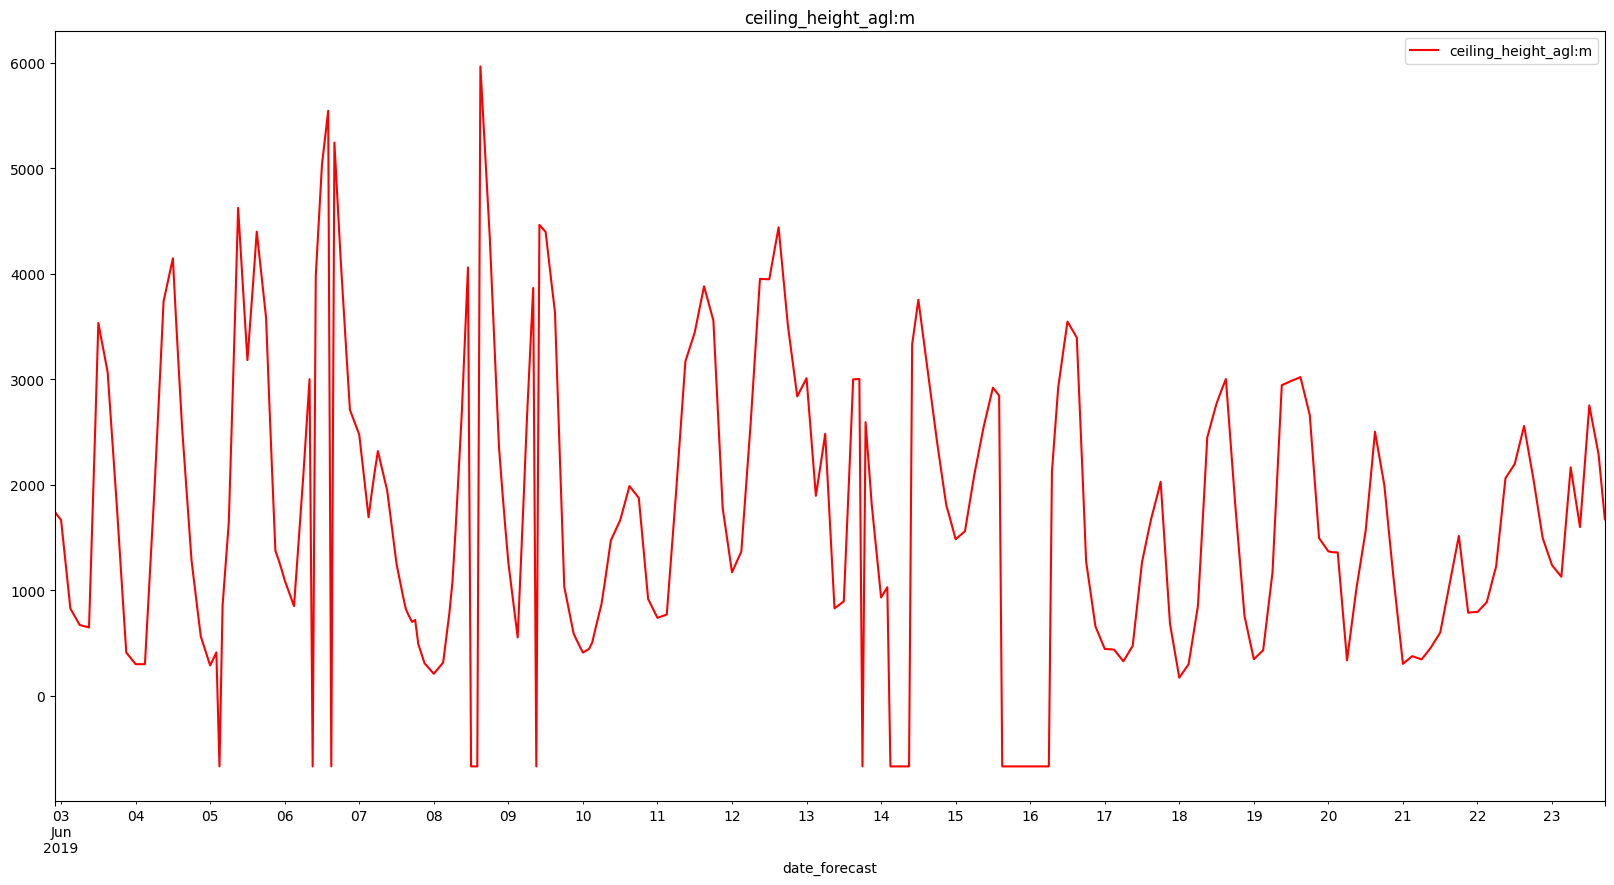

In [128]:
dm.plot_feature(dm.data_A[0:500], "ceiling_height_agl:m")